<a href="https://colab.research.google.com/github/somezzedup/Machine-Learning-Projects/blob/main/k_nearest_neighbors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Nearest Neighbors (K-NN)

KNN is a a data classification method for estimating the likelihood that a data point will become a member of one group or another based on what group the data points nearest to it belong to.

The k-nearest neighbor algorithm is a type of supervised machine learning algorithm used to solve classification and regression problems. However, it's mainly used for classification problems.



## Importing the libraries

In [ ]:
#importing libraries
#computes a wide variety of mathematical operations on arrays
import numpy as np
#plots figures
import matplotlib.pyplot as plt
#for reading and analyzing csv files
import pandas as pd
import seaborn as sns

## Importing the dataset

In [ ]:
dataset = pd.read_csv('https://raw.githubusercontent.com/glopez21/ML-Data/main/Social_Network_Ads.csv')

In [ ]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
#Importing data about specific user on social networks that has a specific user ID, 
#has their gender, age, and estimated salary posted
dataset = pd.read_csv('https://raw.githubusercontent.com/glopez21/ML-Data/main/Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values 
y = dataset.iloc[:, -1].values

In [ ]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


## Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
#assigning 25% of the data for testing and 75% for training
#random_state controls the shuffling applied to the data before applying the split,
# all of split and test data will be the same if we assign random_state to any integer value
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
#training and transforming our train data using fit.tranform function
X_train = sc.fit_transform(X_train)
#transforming our test data 
X_test = sc.transform(X_test)

## Training the K-NN model on the Training set

In [ ]:
#We are importing the KneighborsClassifier function from sklearn.neighbors library 
from sklearn.neighbors import KNeighborsClassifier
#n_neighbors = 5 means our K value is 5. 
#The default metric is minkowski, and with p=2 is equivalent to the standard Euclidean metric (calculates distance between two points)
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
#Training our data 
classifier.fit(X_train, y_train)

KNeighborsClassifier()

## Predicting the Test set results

In [ ]:
y_pred = classifier.predict(X_test)

## Making the Confusion Matrix

A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known. ... The classifier made a total of 165 predictions (e.g., 165 patients were being tested for the presence of that disease)

In [ ]:
from sklearn.metrics import confusion_matrix
#Computes confusion matrix to evaluate the accuracy of a classification.
cm = confusion_matrix(y_test, y_pred)

#prints the confusion matrix
print(cm)

[[64  4]
 [ 3 29]]


## Visualising the Training set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


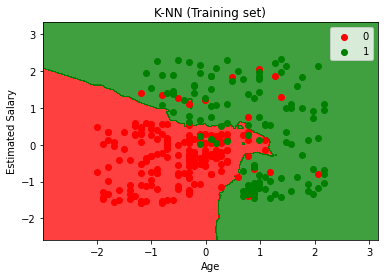

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

#plt.contour draws contour lines. 
#The alpha blending value, between 0 (transparent) and 1 (opaque).
#setting the color of the graph through the use of cmap
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
#Setting limits for the x-axis
plt.xlim(X1.min(), X1.max())
#Setting limits for the y-axis
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Training set)') #The title of the plot
plt.xlabel('Age') #the xlabel of the plot 
plt.ylabel('Estimated Salary') #the ylabel of the plot 
plt.legend() #Shows the legend of the plot 
plt.show() #Shows the output of the plot 

## Visualising the Test set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


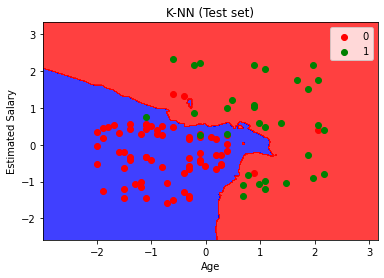

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('blue', 'red')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()